Project plan

1. problem formulation :  
Context : we have been instructed to predict books ratings via a machine learning application from provided data.  
2. Data preprocessing
3. EDA
4. features engineering 
5. modelling & Machine learning 
6. Model validation
7. deployment

In [146]:
#!conda env list

In [147]:
# activate environment 
#!conda init bash
#!conda activate Project1

In [148]:
#pip install statsmodels

In [149]:
# load libraries 
import pandas as pd
import numpy as np
#import seaborn as sns
#import matplotlib as plt
#import plotly as ply
import sklearn as skl
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import re 
from IPython.display import clear_output, display, HTML, Javascript

In [150]:
# load data 
df = pd.read_csv("books.csv")

2 Data preprocessing 

2.1  inspect data 

In [151]:
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [152]:
df.tail(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [153]:
# df shape 
df.shape

(11127, 12)

In [154]:
# columns names
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [155]:
# describe numeric variables
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
bookID,11127.0,2.131094e+04,1.309336e+04,1.000000e+00,1.028700e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11127.0,3.933631e+00,3.524450e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.135000e+00,5.000000e+00
isbn13,11127.0,9.759888e+12,4.428964e+11,8.987060e+09,9.780345e+12,9.780586e+12,9.780873e+12,9.790008e+12
num_pages,11127.0,3.363769e+02,2.411273e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11127.0,1.793641e+04,1.124794e+05,0.000000e+00,1.040000e+02,7.450000e+02,4.993500e+03,4.597666e+06
text_reviews_count,11127.0,5.418545e+02,2.576177e+03,0.000000e+00,9.000000e+00,4.600000e+01,2.375000e+02,9.426500e+04


In [156]:
# describe non-numeric  variables
df.describe(include="object").T

,count,unique,top,freq
title,11127,10352,The Brothers Karamazov,9
authors,11127,6643,Stephen King,40
isbn,11127,11127,0439785960,1
language_code,11127,27,eng,8911
publication_date,11127,3679,10/1/2005,56
publisher,11127,2292,Vintage,318


There is no duplicate ID in data as isbn is 11127 the data set number of cases. 

2.2  clean data 

2.2.1 Clean publication date 

In [157]:
# change from string to datetime object 
# for loop to parse date 
df["publication_Date"]= pd.Series(dtype="int")
cnt = 0
for i in range(len(df.publication_date)) :
    month,day,year = map(int,df.publication_date[i].split('/'))

    if month in [4,6,9,11] and day > 30:
        day = 30
        df["publication_Date"][i] = dt.date(year,month,day)
    elif(month==2 and day > 28 and year % 4 != 0):
        day = 28
    df["publication_Date"][i] = dt.date(year,month,day)
    cnt +=1
if (cnt == len(df.publication_date)) :
    print("no date issue" )
 

no date issue


/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_86434/1680810485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_Date"][i] = dt.date(year,month,day)


In [158]:
# remove heading whitespace from num_pages feature 
df = df.rename(columns = {"  num_pages" : "num_pages"})
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'publication_Date'],
      dtype='object')

In [159]:
#na check in the entire dataset 
df.isna().sum().sum()

0

There is no NA in df

In [160]:
# na check in average_rating
if (df.average_rating.isna().mean() == 0 ) :
    print("There is no NA in average_rating")
else:
    print("There are NA in average_rating")

There is no NA in average_rating


3 EDA 

1D EDA 

3.1 Numerical summary and 1D plot

In [161]:
# numerical summary : average_rating 
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

<AxesSubplot: >

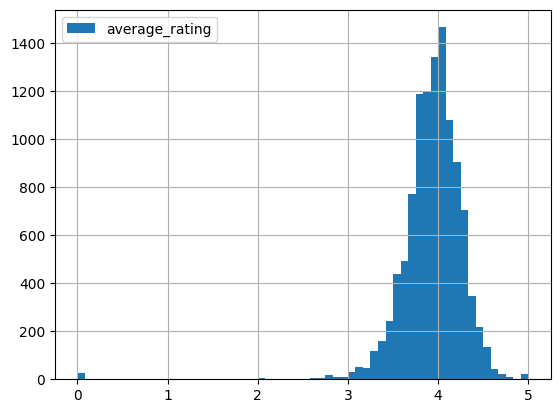

In [162]:
# histogram of average ratings 
df.average_rating.hist(bins=60,legend={""})

<AxesSubplot: >

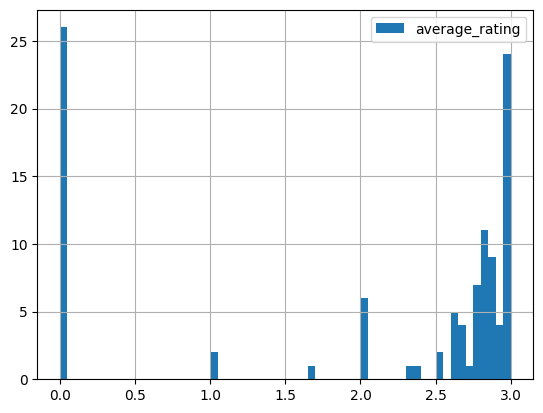

In [163]:
# histogram of average ratings :range [0,3.9]
df.average_rating.hist(bins=60,range = [0,3],legend={""})

<AxesSubplot: >

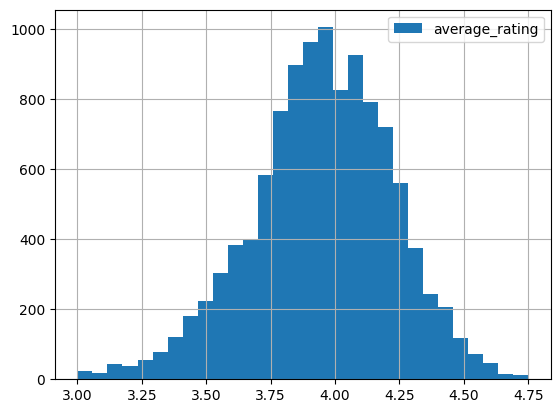

In [164]:
# histogram of average ratings :range [0,4.75]
df.average_rating.hist(bins=30,range = [3,4.75],legend={""})

<AxesSubplot: >

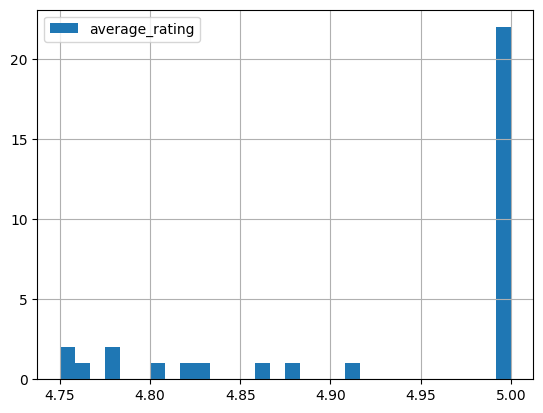

In [165]:
# histogram of average ratings :range [0,3.9]
df.average_rating.hist(bins=30,range = [4.75,5],legend={""})

In [166]:
# number of cases where averating are <= 3
df.loc[df.average_rating <= 3].shape

(104, 13)

In [167]:
# number of cases where average rating >= 4.75 
df.loc[df.average_rating > 4.75].shape

(31, 13)

In [168]:
# average ratings sumary statistics 
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

In [169]:
#average_rating 1st and 3rd quantile 
IQR_average_rating = df.quantile([0.25,0.75])[["average_rating"]]
IQR_average_rating

/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_86434/3277316177.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR_average_rating = df.quantile([0.25,0.75])[["average_rating"]]


,average_rating
0.25,3.770
0.75,4.135


average_ratings is almost an unimodal distribution with some outliers.
It has median 3.96 and IQR : 0.3 

In [170]:
#numerical summary num_pages
df.num_pages.describe()

count    11127.000000
mean       336.376921
std        241.127305
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

<AxesSubplot: >

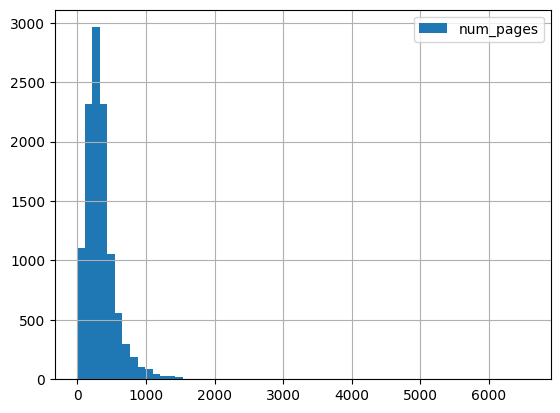

In [171]:
# histogram of num_pages 
df.num_pages.hist(bins = 60,legend={""})

Num_pages is almost an unimodal distribution, right skewed showing that  at least 50% of books presents 299 pages.

In [172]:
# numerical summary ratings_count 
(df.ratings_count
.quantile([0.25,0.5,0.75, 1])
)

0.25        104.0
0.50        745.0
0.75       4993.5
1.00    4597666.0
Name: ratings_count, dtype: float64

Maximum rating count is so high that it seems suspect !

In [173]:
# which book has this ratings count ?
df.title[df.ratings_count == max(df.ratings_count) ]

10340    Twilight (Twilight  #1)
Name: title, dtype: object

Twilight is the book with the highest ratings_count.  

<AxesSubplot: >

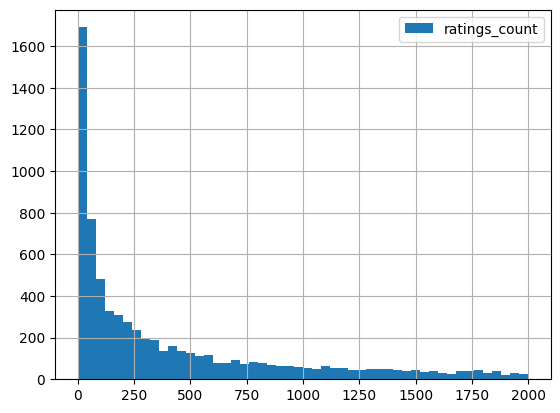

In [174]:


# histogram of ratings_count 
df.ratings_count.hist(bins = 50,range = [0,2000],legend ={""})

Ratings count distribution is unimodal, right skewed. At least 50% of books ratings count is greater or equal to 745.

In [175]:
# numerical summary publication Date
df.publication_Date.describe()

count          11127
unique          3678
top       2005-10-01
freq              56
Name: publication_Date, dtype: object

In [176]:
(df
["publication_Date"]
.quantile([0.0,0.25,0.5,0.75,1])
)

0.00    1900-01-01
0.25    1998-07-17
0.50    2003-03-01
0.75    2005-09-30
1.00    2020-03-31
Name: publication_Date, dtype: object

<AxesSubplot: >

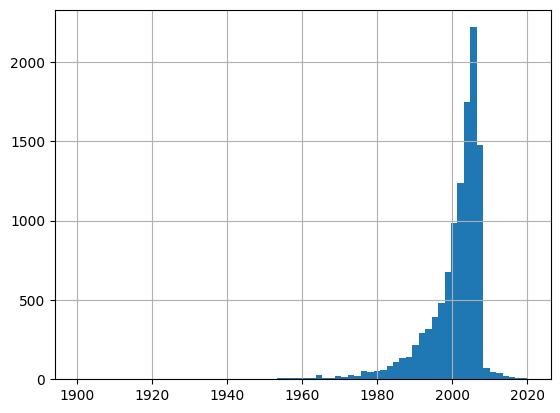

In [177]:
# histogram of publication date 
df.publication_Date.hist(bins = 70)

Publication date distribution is unimodal and left skewed. At least 50% of books has been published before between 1998 and 2005.

How many books are written in english ?

In [178]:
# language code 
df3 = df.groupby("language_code").count()
# round 
round(df3.bookID.filter(regex ="^[Ee][Nn][g\\-]")/df.shape[0],2)

language_code
en-CA    0.00
en-GB    0.02
en-US    0.13
eng      0.80
Name: bookID, dtype: float64

95% of book are written in English. The english type being different.  
It may be reasonble to turn language code into a binary variable.  

Who are the five most prolific authors ?

In [179]:
# authors
(df.groupby("authors")
 .count()
 .sort_values("title",ascending=False)
 [["title"]]
 .head(5)
)

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33


5 most prolific authors are :  
1. S. king
2. P.G. Wodehouse
3. Rumiko Takahashi
4. Orson Scott Card
5. Agatha Christie

Who are the 5 more prolific publisher ?

In [180]:
(df.groupby("publisher")
 .count()
 .sort_values("title",ascending=False)
 [["title"]]
 .head(5)
)

,title
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144


The 5 most productive publisher are :   
1. Vintage
2. Penguin Books 
3. Penguin Classics
4. Mariner Books
5. Ballantine Books

What are the first 5 well rated titles ?

In [181]:
(df.groupby("title")
 .agg("mean")
 .sort_values(by ="average_rating",ascending=False)
 [["average_rating"]]
 .head(5)
)

/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_86434/2829122476.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.groupby("title")


,average_rating
title,
The Complete Theory Fun Factory: Music Theory Puzzles and Games for the Early Grades,5.0
The Irish Anatomist: A Study of Flann O'Brien,5.0
Colossians and Philemon: A Critical and Exegetical Commentary (International Critical Commentary),5.0
The American Campaign: U.S. Presidential Campaigns and the National Vote,5.0
Bill Gates: Computer Legend (Famous Lives),5.0


Above are the 5 well rated books title in this dataset. 

We are not going to do EDA on bookID, isbn, isbn13. 
The first 3 are identifiers and have no variation, though it won't bring enough information to the model. 

Turn language code into a binary variable and perform EDA. 

In [182]:
# bin language code  eng : 1 , other : 0
language_code_bin = []
for i in range(len(df.language_code)) :
    if re.match("^([Ee][Nn].+)",df.language_code[i]):
        language_code_bin.append(1)
    else:
        language_code_bin.append(0) 
df["language_code_bin"]  = language_code_bin

What is the proportion of books written in English language?

In [183]:
# proportion of english in language code. 
(df.groupby("language_code_bin")
 .count()/len(df.language_code_bin)
 ).round(3)[["title"]]

,title
language_code_bin,
0,0.052
1,0.948


English language has a proportion of 0.95 in language code. 95% of our books are written in English. 

== Finding association between variables ==  
 3.2 Numerical summary and  2D plot 


Is there any association between number of pages and average rating ?

<AxesSubplot: xlabel='num_pages', ylabel='average_rating'>

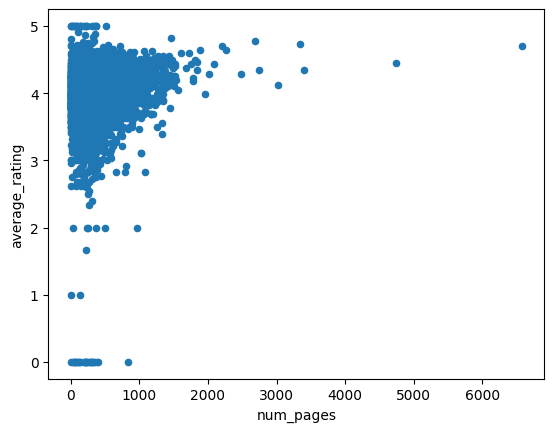

In [184]:
# scatter plot average rating vs num_pages
df.plot.scatter(x="num_pages",y = "average_rating")

In [185]:
# correlation cofficient between average rating and num_pages
round(df.average_rating.corr(df.num_pages),2)

0.15

The correlation coeffication is 0.15. This suggest a weak linear association between 
average rating and number of pages. 

<AxesSubplot: xlabel='text_reviews_count', ylabel='average_rating'>

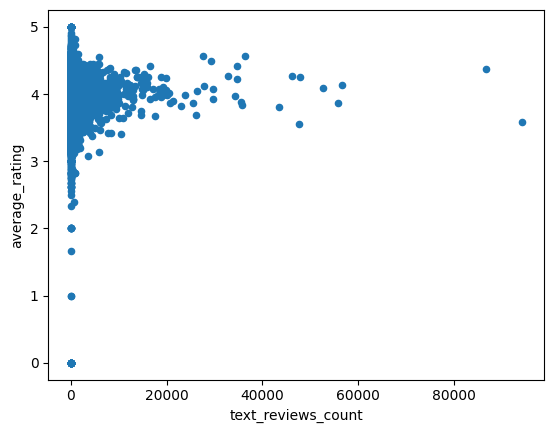

In [186]:
# scatter plot average_rating vs text_reviews_count 
df.plot.scatter(x="text_reviews_count",y = "average_rating")

There is not a clear pattern between these 2 variables.  

In [187]:
# correlation coef
round(df.average_rating.corr(df.text_reviews_count),2)

0.03

The correlation coef is almost 0. This suggest no association between average rating and text reviews count. 

<AxesSubplot: xlabel='ratings_count', ylabel='average_rating'>

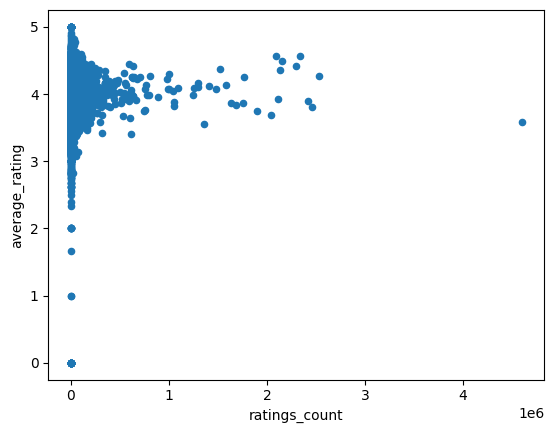

In [188]:
# scatter plot average rating. vs ratings count 
df.plot.scatter(x="ratings_count",y = "average_rating")

In [189]:
# correlation coeff between average rating and ratings count 
round(df.average_rating.corr(df.ratings_count),2)

0.04

The correlation coefficient between average rating and ratings count is 0.04. This suggest that there is almost no association between average rating and rating count. 

Is there any association between rating_count   and text-reviews_count ?

In [190]:
round(df.ratings_count.corr(df.text_reviews_count),2)

0.87

Rating_count and text_reviews_count are linear correlated. Therefore , we will remove one of it from the analysis.

what is the average rating of books written in english ?

In [191]:
(df.groupby("language_code_bin")
 .agg("mean")
[["average_rating"]]
.round(2)
)

/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_86434/2976189250.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.groupby("language_code_bin")


,average_rating
language_code_bin,
0,3.98
1,3.93


On average,books written in English are less well rated than books written in other languages.  but the the difference near 0. 

=== 2D EDA SUMMARY ===    
-numerical features are not strongly associated with average rating if considering a linear assosiation. In a linear modeling numerical features have no effect or a little one on average rating. Let's investigate other models i.e. tree based model or svm. 

Qualitative variable,i.e. language_code has on average a rating of 3.9

4 === features engineering part1  ===  
we are going to remove bookID, title , authors,isbn,isbn13, publisher because they have or present no variation and are less informative for our application.  

In [192]:
# create a new dataframe : df1 and remove some features 
df_qualitative = df[['bookID','title','authors','isbn','isbn13',
               'publisher']]
df_qualitative

,bookID,title,authors,isbn,isbn13,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,9780439785969,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,9780439358071,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,9780439655484,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,0439682584,9780439682589,Scholastic
...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,1560254416,9781560254416,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,0140110879,9780140110876,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,0140131965,9780140131963,Penguin Books
11125,45639,Poor People,William T. Vollmann,0060878827,9780060878825,Ecco


In [193]:
df_qualitative.head(2)

,bookID,title,authors,isbn,isbn13,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,9780439785969,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,9780439358071,Scholastic Inc.


4.1 Discretize average_rating

In [194]:
# discretize average rating 
av_cat = []
av_cat = pd.cut(df.average_rating,bins=[0,1,2,3,4,5,6],
                    labels = ["0","1","2","3","4","5"],
                    include_lowest=True)
df_qualitative["av_cat"] = av_cat

/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_86434/744164174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualitative["av_cat"] = av_cat


In [195]:
# head average rating 
df_qualitative.av_cat.head(3)

0    4
1    4
2    4
Name: av_cat, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']

In [196]:
# tail av rating 
df_qualitative.av_cat.tail(3)

11124    3
11125    3
11126    3
Name: av_cat, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']

In [197]:
# proportion of classes in the data 
round(df_qualitative.av_cat.value_counts()/ len(df_qualitative.av_cat),3)

3    0.565
4    0.426
2    0.006
0    0.003
1    0.001
5    0.000
Name: av_cat, dtype: float64

There is 40% of data in class 4 and 56% in class 3. 

<AxesSubplot: >

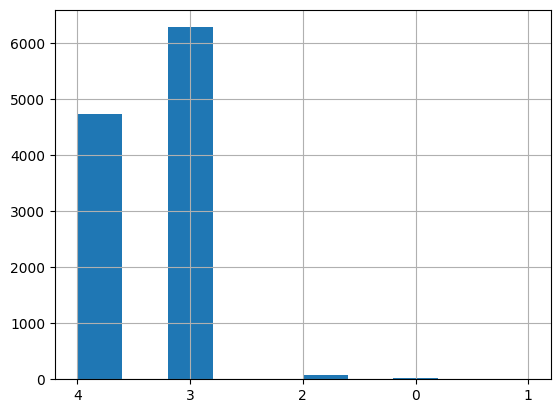

In [198]:
df_qualitative.av_cat.hist()

Discretizing average_rating  make it unbalanced data.  
We need to fix unbalalced data.

================================ REGRESSION ========================================

4.2 Splitting data 

In [199]:
# selecting numerical features
df_final = df[['average_rating', 'num_pages','text_reviews_count', 
          "language_code_bin"]]

In [200]:
from sklearn.model_selection import train_test_split
train0,test = train_test_split(df_final, test_size= 20,random_state=42)

In [201]:
# split train0 in train and valid 
train,valid = train_test_split(train0,test_size=40,random_state=42)

In [202]:
# subsetting 
# train0
X_train0 = train0.drop("average_rating",axis = 1)
y_train0 = train0.average_rating

# train
X_train = train.drop("average_rating",axis = 1)
y_train = train.average_rating

# valid 
X_valid = valid.drop("average_rating",axis=1)
y_valid = valid.average_rating

# test 
X_test = test.drop("average_rating",axis = 1)
y_test = test.average_rating

5 modelling : model testing 

5.1 Linear models

-linear model : OLS

In [203]:
# linear model 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

-regularized linear models

-Ridge : alpha = 0.01 

In [204]:
# regularized model : ridge model, alpha = 0.1 
reg_ridge = linear_model.Ridge(alpha=0.01)
reg_ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

-ridge alphas, cv = 5

In [205]:
# ridge model with cross validation 
# regularized model : ridge model with cv =5
reg_ridge_CV = linear_model.RidgeCV(alphas=[0.001,0.01],cv=5)
reg_ridge_CV.fit(X_train0,y_train0)

RidgeCV(alphas=[0.001, 0.01], cv=5)

-Lasso

In [206]:
#from sklearn import linear_model, alpha = 0.5
reg_lasso = linear_model.Lasso(alpha=0.5)
reg_lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

5.2 Tree based model 

In [207]:
# tree based model 
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=40)
tree_reg= regressor.fit(X_train,y_train)

5.3 Ensemble models

In [208]:
 #random forest
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators= 100,
#max_depth = 5,
random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

5.4 Support vectors machine 

In [209]:
# linear svm
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, random_state=0)
svm_regr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=0, tol=1e-5,max_iter=100000))
svm_regr.fit(X, y)

#

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(max_iter=100000, random_state=0, tol=1e-05))])

5.5 gbm

In [210]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [211]:
# cross val custom function 
def model_cross_val(models={}, X_validation=None,y_validation= None,cv=None, scoring = "neg_mean_squared_error"):
    from sklearn.model_selection import cross_val_score
    table = []
    for model in models :
        score = abs(
            cross_val_score(models[model],
                            X_validation,
                            y_validation,
                            cv=cv,
                            scoring=scoring ).mean()
        )
        score = pow(score,.5)
        table.append(score)
    print(
         pd.DataFrame(data = table,index = models,columns = ["rmse"])
        .sort_values(by ="rmse")
        
    )



 Models dictionary for performance 

In [212]:
# models to cross-validate 

# models to cross validate
models = {"linear reg": reg,
          "ridge model":reg_ridge,
          "lasso model ": reg_lasso,
          "ridge CV":reg_ridge_CV,
          "random forest":rf,
          "linear svm":svm_regr,
           "gbm": gbm
         }

In [213]:
# cross validation  
model_cross_val(models,X_valid,y_valid,cv= 10)

                   rmse
linear svm     0.363405
lasso model    0.363797
ridge model    0.364707
ridge CV       0.364707
linear reg     0.364769
random forest  0.395679
gbm            0.474387


In [214]:
# detect and remove outliers function
def remove_outliers(X,bins = 50, plot = "bool"):
    # q1 and q3 quantiles
    q1,q3 = X.quantile([0.25,0.75])

    #interquatile range 
    iqr = q3 - q1
   

    # remove  q1 - 1.5*iqr or  q3 + 1.5*iqr:
    X =  X[X.between(q1 - 1.5*iqr, q3 + 1.5*iqr,inclusive = "both")]
       

    # histogram
    if plot :
          X.hist( bins = bins,legend = {""})
    return X



In [215]:
# remove ouliers OR NOT
q1,q3 = df.average_rating.quantile([.25,.75])
iqr = q3 - q1
#df_mdl = df_final[df_final.average_rating.between(q1 - 1.5*iqr, q3 + 1.5*iqr,inclusive = "both")]
df_mdl = df[["average_rating","num_pages","language_code_bin"]]

In [216]:
df_mdl.head(2)

,average_rating,num_pages,language_code_bin
0,4.57,652,1
1,4.49,870,1


<AxesSubplot: >

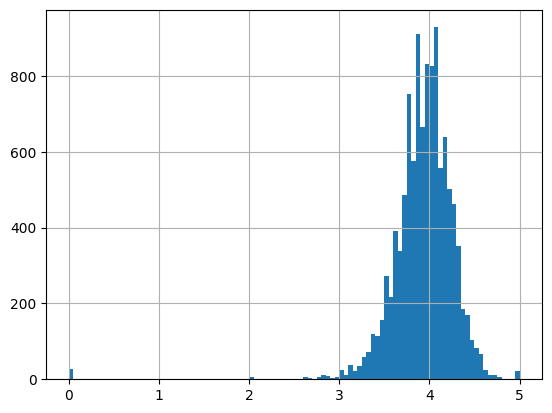

In [217]:
df_mdl.average_rating.hist(bins = 100)


0        4.57
1        4.49
2        4.42
3        4.56
5        3.74
         ... 
11122    4.06
11123    4.08
11124    3.96
11125    3.72
11126    3.91
Name: average_rating, Length: 10877, dtype: float64

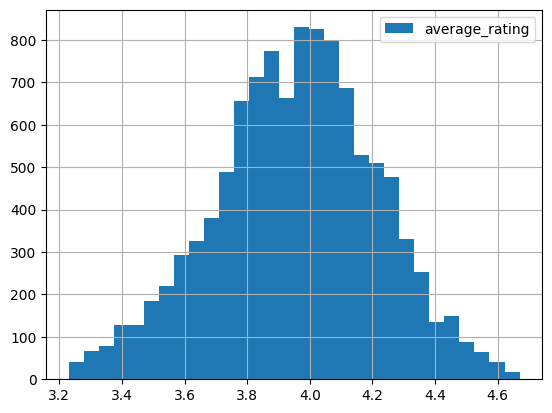

In [218]:

remove_outliers(df_mdl.average_rating, bins = 30)


Removing outliers, concentrate average rating between 3.9 and 4.6. 

In [219]:
remove_outliers(df_mdl.average_rating, plot = False).describe()

count    10877.000000
mean         3.954758
std          0.261329
min          3.230000
25%          3.790000
50%          3.960000
75%          4.140000
max          4.670000
Name: average_rating, dtype: float64

0        652
2        352
3        435
5        152
9        215
        ... 
11122    512
11123    635
11124    415
11125    434
11126    272
Name: num_pages, Length: 10587, dtype: int64

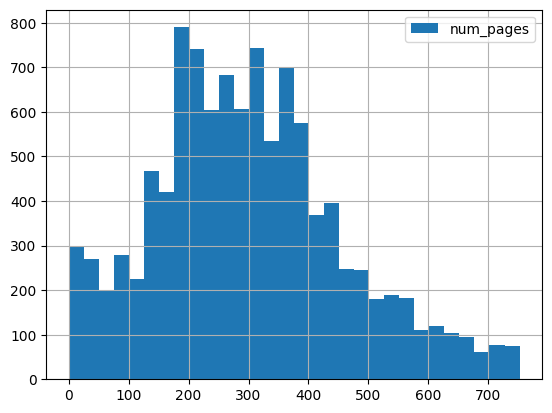

In [220]:
# remove outliers from num_pages
remove_outliers(df_mdl.num_pages,bins = 30)

We end up with 11098 cases.  

In [221]:
from sklearn.model_selection import train_test_split
# split data
train,test = train_test_split(df_mdl, test_size= 0.4,random_state=42)

# train
X_train = train.drop("average_rating",axis=1)
y_train = train.average_rating

# test
X_test = test.drop("average_rating",axis=1)
y_test = test.average_rating

In [222]:
X_train.head(2)

,num_pages,language_code_bin
237,752,1
1532,168,1


In [223]:
# linear model 
reg.fit(X_train,y_train)

LinearRegression()

In [224]:
# stats model package
X = sm.add_constant(X_train)
mdl = sm.OLS(y_train,X_train)
fit = mdl.fit()
# print model 
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:         average_rating   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                          5.794e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:12:14   Log-Likelihood:                         -8926.9
No. Observations:                6676   AIC:                                  1.786e+04
Df Residuals:                    6674   BIC:                                  1.787e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In a linear regression setting, ratings_count has a negative influence on average rating  


!!! Without outliers, we do not have multicollinearity in data in the above summary table. 

In [225]:
# lasso
reg_lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [226]:
#ridge
reg_ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [227]:
# random forest
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [228]:
# svm
svm_regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(max_iter=100000, random_state=0, tol=1e-05))])

In [229]:
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)

GradientBoostingRegressor(random_state=0)

7 Models new evaluation

In [230]:
model_cross_val(models,X_validation=X_test, y_validation=y_test, cv = 10)

                   rmse
ridge model    0.346476
ridge CV       0.346476
linear reg     0.346476
lasso model    0.346712
linear svm     0.347041
gbm            0.348566
random forest  0.370773


== Regression application : conclusion  === 
* The models performance is better without outliers.  
* Linear models are better than non-linear ones in general, but the difference is not so big than that. 
* The candidate models could be gbm, Lasso and ridge with CV, i.e. Regularized linear regression models.

==== model evaluation : hyper parmeters search ===

In [231]:
 # IMPORT validation curve 
from sklearn.model_selection import validation_curve

In [232]:
# gbm hyper params search : gbm hyper-params 
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [233]:
# search strategy : halving random search
#from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import uniform

# hyper-params search
distributions = dict(alpha=[0.1,0.2,0.3,0.4,0.5],
                      learning_rate=[0.001,0.1,1,10],
                      max_depth = [1,2,3,4])

gbm_hp = RandomizedSearchCV(gbm, distributions,
                            scoring = ["max_error","r2"],
                            random_state=0,
                           refit = "max_error")
search_gbm = gbm_hp.fit(X_train, y_train)

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/model_selection/_search.py:961: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


In [234]:
search_gbm.best_estimator_

GradientBoostingRegressor(alpha=0.5, max_depth=1, random_state=42)

In [235]:
#gbm evaluation
gbm_hp2 = search_gbm.best_estimator_
                   

In [236]:
# lasso hyper-params  list
reg_lasso.get_params()

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [237]:
# lasso evaluation
distributions = dict(alpha=[0.1,0.2,0.3,0.4,0.5])

# hyper-params search 
lasso_hp = RandomizedSearchCV(reg_lasso, 
                              distributions, 
                              scoring = ["max_error","r2"],
                              refit = "max_error",
                              random_state=0)
search_lasso = lasso_hp.fit(X_train, y_train)
lasso_hp2 = search_lasso.best_estimator_

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [238]:
# best lasso estimator 
lasso_hp2 

Lasso(alpha=0.1)

This lasso model/estimator  alpha is not different from the initial one. We hypothesize no amelioration in performance with respect to gbm estimator. 

In [239]:
#  model evaluation
# models dictionary
models_hp = {"gbm" : gbm_hp2, 
             "lasso" :lasso_hp2}

# models evaluation 
model_cross_val(models_hp,train0,y_train0,cv = 10)

           rmse
gbm    0.021864
lasso  0.287826


In [240]:
# model validation : use test set
model_cross_val({"gbm":gbm_hp2},test,y_test,cv = 2)

         rmse
gbm  0.028194


gbm presents a rmse of 0.028 with test set.

Conclusion :  
Following, hyper-parameters search, gbm shows a far better rmse of 0.021 and lasso a rmse of 0.29.
gbm performance improved with hyper-parameters search, while lasso did not. Therefore for this application and in a regression setting, we would recommend gbm as final model.

In test step (model evaluation) gbm yields 0.028, which is almost similar to the validation rmse. However, we would recommend further, hyper-parameters search and investigation to fine tune this model again with a large random parameters set or grid search strategy instead.

Suggestion :
We would suggest to further perform more hyper-params search to control any overfitting issue with gbm.

In [241]:
#vocal message 
display(Javascript("""
  var msg = new SpeechSynthesisUtterance();
  msg.text = "End of file...";
  window.speechSynthesis.speak(msg);
"""))

<IPython.core.display.Javascript object>